# Titanic

## Imports

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.preprocessing as preproc

## Collecting data

In [10]:
# import data
train_data = pd.read_csv('Data/train.csv');
test_data = pd.read_csv('Data/test.csv');
test_results = pd.read_csv('Data/gender_submission.csv');

In [11]:
# column names
columns = list(train_data);

## Data analysis

In [13]:
# missing values analysis
# check how many missing values are in each column
missingValues = train_data.isna().sum();
missingValues = missingValues.sort_values(ascending=False);
print(missingValues);

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64


In [71]:
def continuous_column_analysis(column):
    survived = train_data.loc[train_data["Survived"]==1][column].dropna();
    dead = train_data.loc[train_data["Survived"]==0][column].dropna();
    plt.hist(survived,bins=25,alpha=0.5,label=column+' for survived');
    plt.hist(dead,bins=25,alpha=0.5,label=column+' for dead');
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.05));
    plt.title("Histograms for '"+column+"'");
    plt.show();

def stacked_bar_columns(column):
    # unique values
    uniqueValues = train_data[column].dropna().unique();
    uniqueValues.sort();
    
    # empty series for unique values
    baseSeries = pd.Series(data=np.zeros(len(uniqueValues)), index=uniqueValues);
    
    # column separated for survived and dead 
    survived = train_data.loc[train_data["Survived"]==1][column].dropna();
    dead = train_data.loc[train_data["Survived"]==0][column].dropna();
    
    # column value counts
    survivedCounts = pd.concat([baseSeries,survived.value_counts()], axis=1)[column].fillna(0);
    deadCounts = pd.concat([baseSeries,dead.value_counts()], axis=1)[column].fillna(0);
    
    # stacked bar chart 
    survivedCounts.plot.bar(color="#006D2C",label="Survived");
    deadCounts.plot.bar(bottom=survivedCounts,color="#31A354",stacked=True,label="Dead");
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.05));
    plt.title("Stacked classes for '"+column+"'");
    plt.show();

def stacked_bar_class(column):
    # unique values
    uniqueValues = train_data[column].dropna().unique();
    uniqueValues.sort();
    
    #initial marginBottom
    marginBottom = pd.Series(data=[0,0])
    
    #chart colors
    colors = ["#006D2C","#31A354","#74C476","#556D2C","#55A354","#55C476","#DD6D2C","#DDA354","#DDC476",
              "#006D00","#31A300","#74C400","#556D55","#55A355","#55C455","#DD6DDD","#DDA3DD","#DDC4DD"];

    # stacked bar chart    
    for num, value in enumerate(uniqueValues):
        col = train_data.loc[train_data[column]==value]["Survived"].dropna();
        colValues = col.value_counts().reindex([0,1]).fillna(0);
        colValues.plot.bar(bottom=marginBottom,color=colors[num],stacked=True,label=value);
        marginBottom += colValues;
    
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.05));
    plt.title("Stacked '"+column+"' values for classes");
    plt.show();

def values_percentage(column):
    values = train_data[column].dropna();
    valuesCount = len(values);
    
    # unique values
    uniqueValues = values.unique();
    uniqueValues.sort();
    
    # empty series for unique values
    baseSeries = pd.Series(data=np.zeros(len(uniqueValues)), index=uniqueValues);
    
    survived = train_data.loc[train_data["Survived"]==1][column].dropna();
    dead = train_data.loc[train_data["Survived"]==0][column].dropna();
    
    survivedCounts = pd.concat([baseSeries,survived.value_counts()], axis=1)[column].fillna(0);
    deadCounts = pd.concat([baseSeries,dead.value_counts()], axis=1)[column].fillna(0);
    
    table = pd.concat([
                survivedCounts.rename('Survived'),
                deadCounts.rename('Dead')
            ], axis=1) / valuesCount;
    
    sns.heatmap(table, annot=True, cmap="Greens");
    plt.show();

def quantized_column_analysis(column):
    stacked_bar_columns(column);
    stacked_bar_class(column);
    values_percentage(column); 

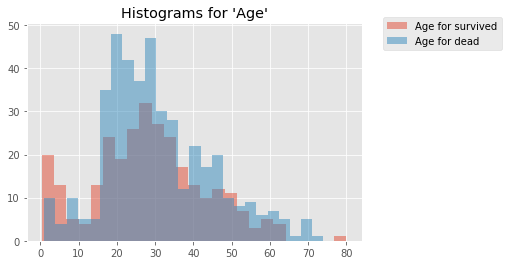

In [72]:
# 'Age' column analysis
continuous_column_analysis("Age");

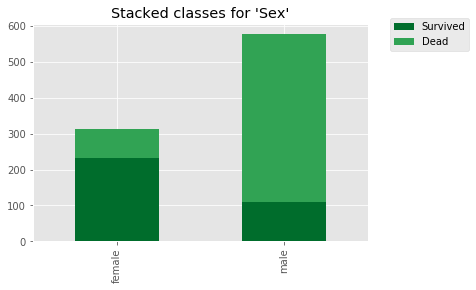

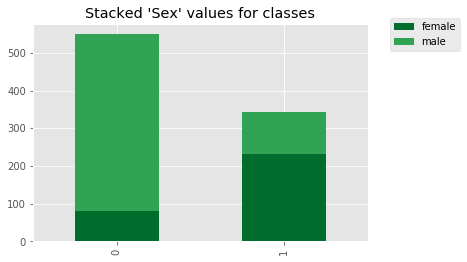

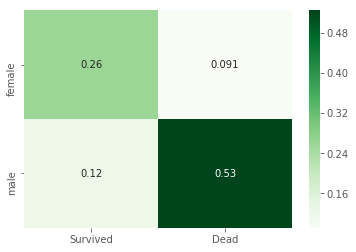

In [73]:
# 'Sex' column analysis
quantized_column_analysis("Sex");

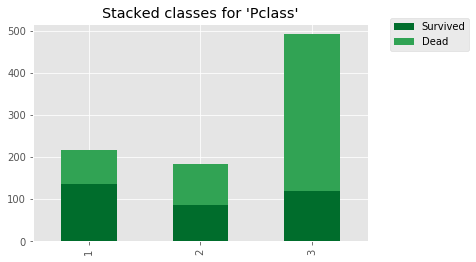

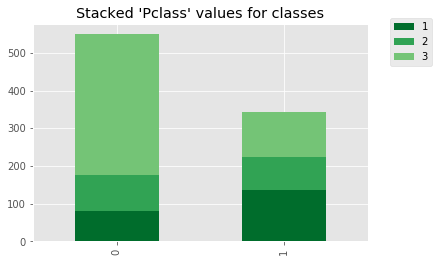

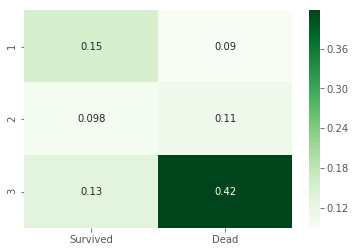

In [74]:
# 'Pclass' column analysis
quantized_column_analysis("Pclass");

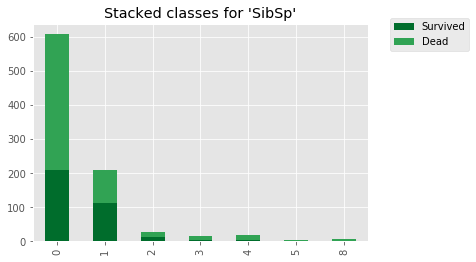

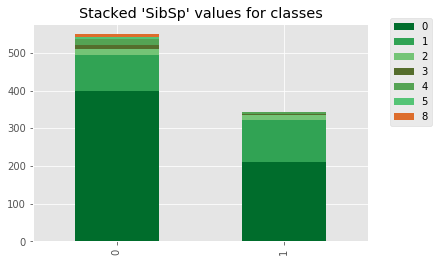

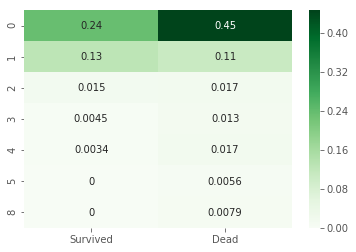

In [75]:
# 'SibSp' column analysis
quantized_column_analysis("SibSp");

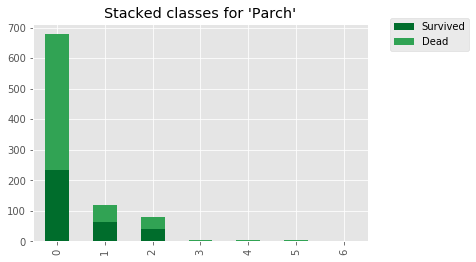

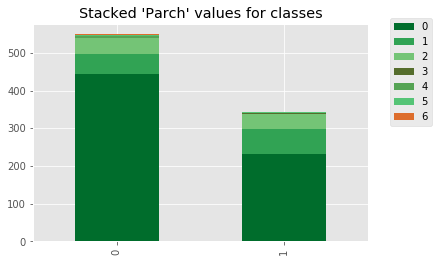

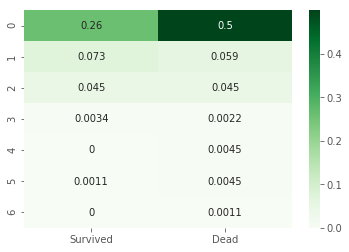

In [76]:
# 'Parch' column analysis
quantized_column_analysis("Parch");

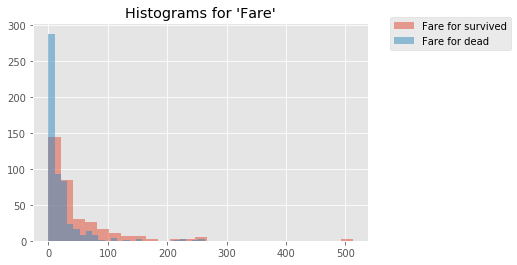

In [77]:
# 'Fare' column analysis
continuous_column_analysis("Fare");

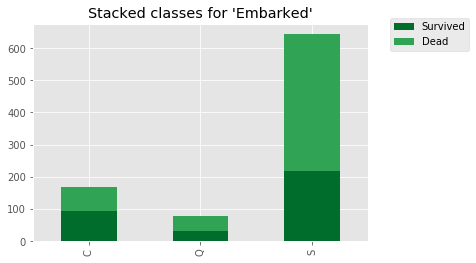

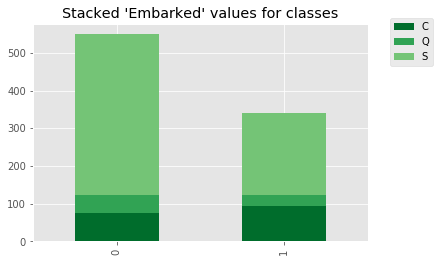

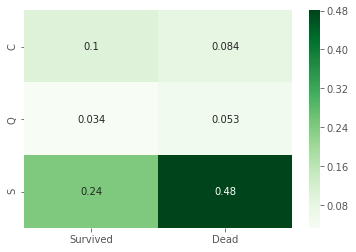

In [78]:
# 'Embarked' column analysis
quantized_column_analysis("Embarked");

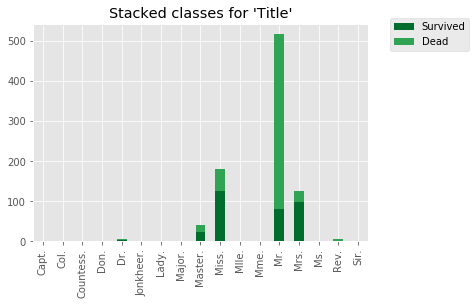

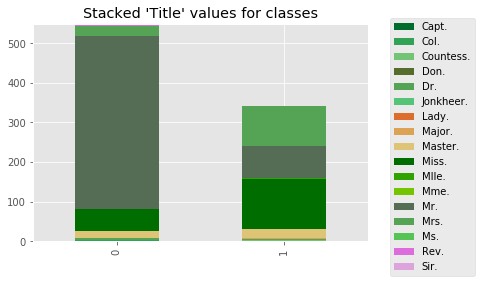

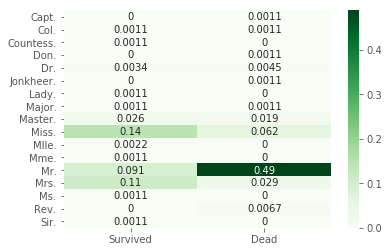

In [80]:
# 'Name' column analysis
name = train_data["Name"];

# extract title from name
title = [[y for y in x.split(' ') if '.' in y][0] for x in name];

# titles analysis
train_data["Title"] = pd.Series(data=title);
quantized_column_analysis("Title");    
train_data = train_data.drop(columns=["Title"], axis=1);

In [69]:
# 'Ticket column analysis'

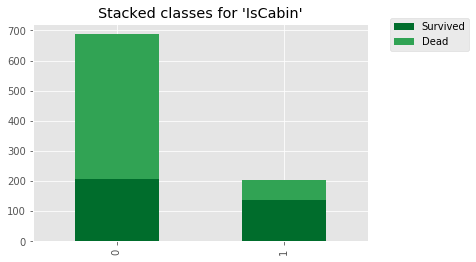

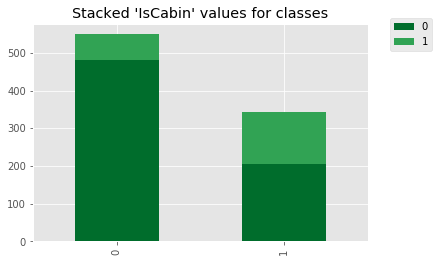

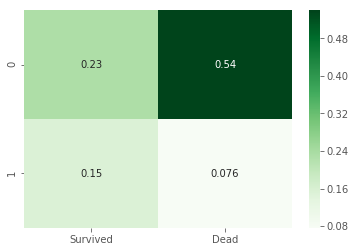

In [81]:
# 'Cabin' column analysis
cabin = train_data["Cabin"];

# check if cabin exists
isCabin = [0 if x!=x else 1 for x in cabin];

# isCabin analysis
train_data["IsCabin"] = pd.Series(data=isCabin)
quantized_column_analysis("IsCabin");    
train_data = train_data.drop(columns=["IsCabin"], axis=1);

## Feature engineering

In [100]:
features =pd.DataFrame();

def get_standarized_column(column):
    standarizedList = preproc.StandardScaler().fit_transform(train_data[[column]]);
    flatStandarizedList = [x for y in standarizedList for x in y];
    return pd.Series(flatStandarizedList);

def get_minmax_scaled_column(column):    
    scaledList = preproc.MinMaxScaler().fit_transform(train_data[[column]]);
    flatScaledList = [x for y in scaledList for x in y];
    return pd.Series(flatScaledList); 
    
def get_labeled_column(column):
    labeledList = preproc.LabelEncoder().fit_transform(train_data[column]);
    return pd.Series(labeledList);   

In [89]:
# 'Age' column analysis
# missing values can be filled by mean (median or most_frequent value) or skipped
filledAgeList = preproc.Imputer().fit_transform(train_data[["Age"]]);
flatFilledAgeList = [x for y in filledAgeList for x in y];
train_data["FilledAge"] = pd.Series(flatFilledAgeList);
features["Age"] = get_standarized_column("FilledAge");
train_data = train_data.drop(columns=["FilledAge"], axis=1);

In [90]:
# 'Sex' column analysis
train_data["LabeledSex"] = get_labeled_column("Sex");
features["Sex"] = get_minmax_scaled_column("LabeledSex");
train_data = train_data.drop(columns=["LabeledSex"], axis=1);

In [91]:
# 'Pclass' column analysis    
features["Pclass"] = get_minmax_scaled_column("Pclass");

In [92]:
# 'SibSp' column analysis
features["SibSp"] = get_minmax_scaled_column("SibSp");

In [93]:
# 'Parch' column analysis    
features["Parch"] = get_minmax_scaled_column("Parch");

In [94]:
# 'Fare' column analysis    
features["Fare"] = get_standarized_column("Fare");

In [95]:
# 'Embarked' column analysis
# fill missing values with 'S' - the most frequent value 
train_data["FilledEmbarked"] = train_data["Embarked"].fillna('S');
train_data["LabeledEmbarked"] = get_labeled_column("FilledEmbarked");
features["Embarked"] = get_minmax_scaled_column("LabeledEmbarked");
train_data = train_data.drop(columns=["FilledEmbarked","LabeledEmbarked"], axis=1);

In [96]:
# 'Name' column analysis
name = train_data["Name"];
title = [[y for y in x.split(' ') if '.' in y][0] for x in name];
train_data["Title"] = pd.Series(data=title);
train_data["LabeledTitle"] = get_labeled_column("Title");
features["Title"] = get_minmax_scaled_column("LabeledTitle");
train_data = train_data.drop(columns=["Title","LabeledTitle"], axis=1);

In [97]:
# 'Ticket' column analysis

In [98]:
# 'Cabin' column analysis
cabin = train_data["Cabin"];
isCabin = [0 if x!=x else 1 for x in cabin];
features["IsCabin"] = pd.Series(data=isCabin);

In [99]:
print(features.head())

        Age  Sex  Pclass  SibSp  Parch      Fare  Embarked   Title  IsCabin
0 -0.592481  1.0     1.0  0.125    0.0 -0.502445       1.0  0.7500        0
1  0.638789  0.0     0.0  0.125    0.0  0.786845       0.0  0.8125        1
2 -0.284663  0.0     1.0  0.000    0.0 -0.488854       1.0  0.5625        0
3  0.407926  0.0     0.0  0.125    0.0  0.420730       1.0  0.8125        1
4  0.407926  1.0     1.0  0.000    0.0 -0.486337       1.0  0.7500        0


## Feature selection

## Modeling

## Charting